### Analysis

1. The cities closer to the equater are going to be hotter, and they are also are higher in humidity.

2. A few of of the cities near the equater have very high wind speed, over 15 mph, while most of the cities further away are under 10 mph. 

3. Cloudiness appears to vary greatly, although cities very near the equater appear to have a very high chance of clouds.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Setup url and query_url for api pulls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Set variable for datetime for date input in graph titles
now = datetime.now()

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_no_cities = len(cities)
total_no_cities

601

In [3]:
# Create lists for data pulled from api request that can later be placed in a dataframe
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Set variables to starting values before loop. Chose -1 for city number because homework example shows each set starting at 0
city_number = -1
set_counter = 1

# Perform a weather check on each city using a series of successive API calls.
for city in cities:
    response = requests.get(query_url + city).json()
    city_number += 1
    try:
    # Include a print log of each city as it's being processed (with the city number and city name). 
        print(f"Processing Record {city_number} of Set {set_counter} | {(response['name'])}")
        city_id.append(response['id'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        if city_number >= 50:
            city_number = -1
            set_counter = set_counter + 1
    # If city is not found print line showing it is being skipped           
    except:
        print(f"City not found. Skipping...")
        pass
# Print when data retrival is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 0 of Set 1 | Saint Paul Harbor
Processing Record 1 of Set 1 | Codrington
Processing Record 2 of Set 1 | Chui
Processing Record 3 of Set 1 | Castro
Processing Record 4 of Set 1 | Lavrentiya
Processing Record 5 of Set 1 | Paka
Processing Record 6 of Set 1 | Cerrito
Processing Record 7 of Set 1 | Severo-Kuril'sk
Processing Record 8 of Set 1 | Gorom-Gorom
Processing Record 9 of Set 1 | Vaini
Processing Record 10 of Set 1 | Tuktoyaktuk
Processing Record 11 of Set 1 | Rikitea
Processing Record 12 of Set 1 | Avarua
Processing Record 13 of Set 1 | Mataura
Processing Record 14 of Set 1 | Nuuk
Processing Record 15 of Set 1 | Dhidhdhoo
Processing Record 16 of Set 1 | Saint-Pierre
Processing Record 17 of Set 1 | São Paulo de Olivença
Processing Record 18 of Set 1 | Airai
Processing Record 19 of Set 1 | Taoudenni
Processing Record 20 of Set 1 | Bestöbe
Processing Record 21 of Set 1 | Adrar
Processing Record 22 of Set 1 | Barrow
City not found. Skipping...
Processing Record 24 of S

City not found. Skipping...
Processing Record 2 of Set 5 | Benguela
Processing Record 3 of Set 5 | Alice Springs
Processing Record 4 of Set 5 | Hasaki
Processing Record 5 of Set 5 | Tiksi
Processing Record 6 of Set 5 | Ostrovnoy
City not found. Skipping...
Processing Record 8 of Set 5 | Nantucket
Processing Record 9 of Set 5 | Aklavik
Processing Record 10 of Set 5 | Dongsheng
Processing Record 11 of Set 5 | Evensk
Processing Record 12 of Set 5 | Karratha
Processing Record 13 of Set 5 | Ancud
Processing Record 14 of Set 5 | Rūdbār
Processing Record 15 of Set 5 | Yangi Marg`ilon
Processing Record 16 of Set 5 | Half Moon Bay
Processing Record 17 of Set 5 | Jalu
Processing Record 18 of Set 5 | Peleduy
Processing Record 19 of Set 5 | Yankton
City not found. Skipping...
Processing Record 21 of Set 5 | Suntar
Processing Record 22 of Set 5 | Mīnāb
Processing Record 23 of Set 5 | Katobu
Processing Record 24 of Set 5 | Leningradskiy
Processing Record 25 of Set 5 | Tsimmerbude
Processing Record 2

Processing Record 1 of Set 9 | Lashio
Processing Record 2 of Set 9 | Gigmoto
Processing Record 3 of Set 9 | Buala
Processing Record 4 of Set 9 | Deputatsky
Processing Record 5 of Set 9 | Ayagoz
Processing Record 6 of Set 9 | Dangara
Processing Record 7 of Set 9 | Nizhniy Tsasuchey
Processing Record 8 of Set 9 | Botlikh
Processing Record 9 of Set 9 | Vardø
Processing Record 10 of Set 9 | Monrovia
Processing Record 11 of Set 9 | Tanout
Processing Record 12 of Set 9 | Tilichiki
Processing Record 13 of Set 9 | Oriximiná
Processing Record 14 of Set 9 | Jewar
Processing Record 15 of Set 9 | Kanniyākumāri
Processing Record 16 of Set 9 | Fairbanks
Processing Record 17 of Set 9 | Kibaya
City not found. Skipping...
Processing Record 19 of Set 9 | Malbork
Processing Record 20 of Set 9 | Kungurtug
Processing Record 21 of Set 9 | Tazmalt
Processing Record 22 of Set 9 | Lagoa
Processing Record 23 of Set 9 | Bafoulabé
Processing Record 24 of Set 9 | Yerbogachën
Processing Record 25 of Set 9 | Atar
Pr

In [4]:
# Create dataframe
weather_df = pd.DataFrame({'City_ID': city_id, 'City': city_name, 'Cloudiness': cloudiness,
                'Country': country, 'Date': date, 'Humidity': humidity, 'Lat': lat, 'Lon': lng,
                'Max Temp': max_temp, 'Wind Speed': wind_speed})

# Display the DataFrame
weather_df.to_csv(output_data_file, index=False)
weather_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,5866583,Saint Paul Harbor,20,US,1596425541,59,57.79,-152.41,64.40,10.29
1,2171099,Codrington,82,AU,1596425558,68,-38.27,141.97,51.98,15.55
2,3443061,Chui,76,UY,1596425627,92,-33.70,-53.46,60.30,2.89
3,3466704,Castro,0,BR,1596425604,96,-24.79,-50.01,49.08,3.65
4,4031637,Lavrentiya,95,RU,1596425652,66,65.58,-171.00,47.84,13.20


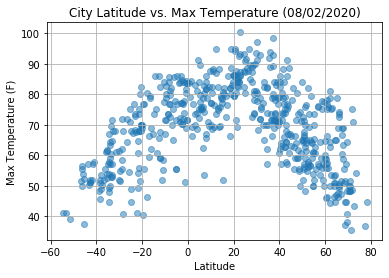

In [5]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], alpha=0.5)

# Add titles
plt.title(f'City Latitude vs. Max Temperature ({now.strftime("%m/%d/%Y")})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

# Show plot with grid
plt.grid(True)
plt.show()

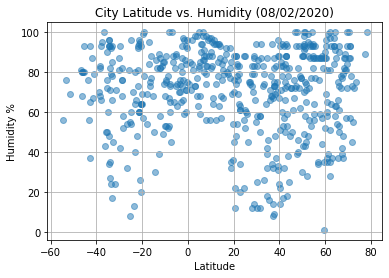

In [6]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], alpha=0.5)

# Add titles
plt.title(f'City Latitude vs. Humidity ({now.strftime("%m/%d/%Y")})')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')

# Show plot with grid
plt.grid(True)
plt.show()

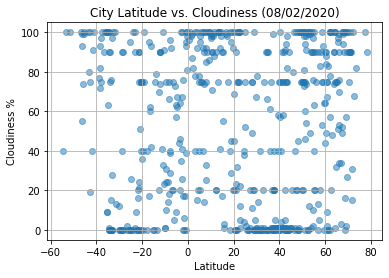

In [7]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], alpha=0.5)

# Add titles
plt.title(f'City Latitude vs. Cloudiness ({now.strftime("%m/%d/%Y")})')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

# Show plot with grid
plt.grid(True)
plt.show()

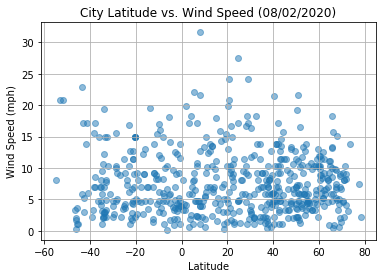

In [8]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], alpha=0.5)

# Add titles
plt.title(f'City Latitude vs. Wind Speed ({now.strftime("%m/%d/%Y")})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

# Show plot with grid
plt.grid(True)
plt.show()

In [9]:
# Create separate dataframes for Northern and Southern hemispheres
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

The r-squared is: -0.6431799524074794


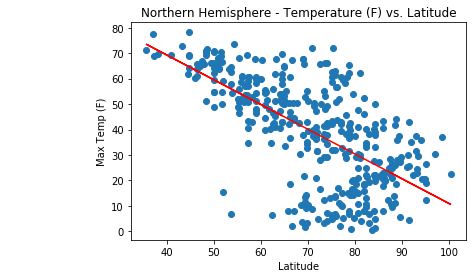

In [10]:
# Northern Hemisphere - Temperature (F) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Max Temp and Latitude for the Northern Hemisphere
northern_temp_correlation = round(st.pearsonr(northern_hemisphere['Max Temp'],northern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = northern_hemisphere['Max Temp']
y_values = northern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Northern Hemisphere - Temperature (F) vs. Latitude')
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.7080522812899211


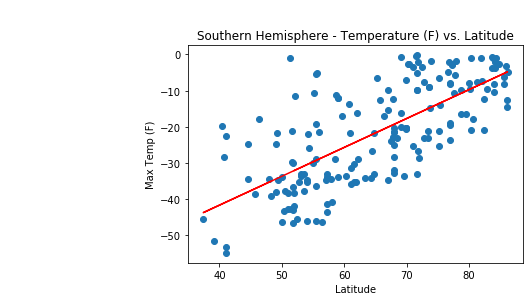

In [11]:
# Southern Hemisphere - Temperature (F) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Max Temp and Latitude for the Southern Hemisphere
sourthern_temp_correlation = round(st.pearsonr(southern_hemisphere['Max Temp'],southern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = southern_hemisphere['Max Temp']
y_values = southern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Southern Hemisphere - Temperature (F) vs. Latitude')
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.057721831316435296


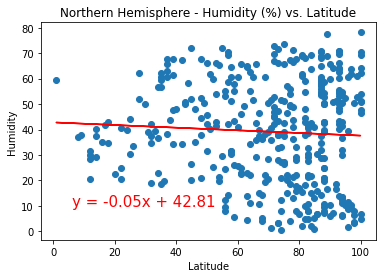

In [12]:
# Northern Hemisphere - Humidity (%) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Humidity and Latitude for the Northern Hemisphere
northern_humid_correlation = round(st.pearsonr(northern_hemisphere['Humidity'],northern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = northern_hemisphere['Humidity']
y_values = northern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude')
plt.ylabel('Humidity')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.1101611476988319


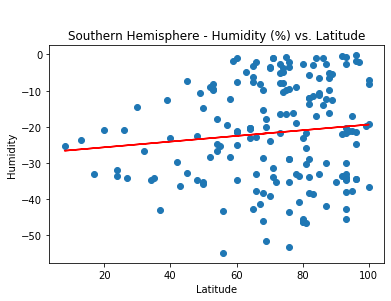

In [13]:
# Southern Hemisphere - Humidity (%) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Humidity and Latitude for the Southern Hemisphere
sourthern_humid_correlation = round(st.pearsonr(southern_hemisphere['Humidity'],southern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = southern_hemisphere['Humidity']
y_values = southern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude')
plt.ylabel('Humidity')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.0015309800116101511


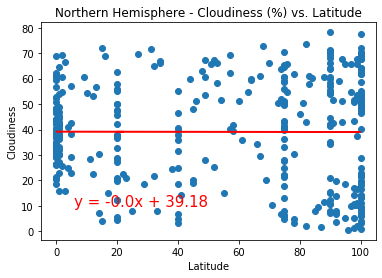

In [14]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Cloudiness and Latitude for the Northern Hemisphere
northern_cloud_correlation = round(st.pearsonr(northern_hemisphere['Cloudiness'],northern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = northern_hemisphere['Cloudiness']
y_values = northern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.14879405937943896


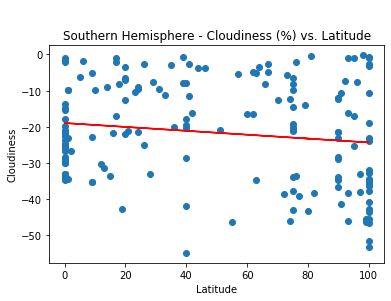

In [15]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Cloudiness and Latitude for the Southern Hemisphere
sourthern_cloud_correlation = round(st.pearsonr(southern_hemisphere['Cloudiness'],southern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = southern_hemisphere['Cloudiness']
y_values = southern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.07295218100520143


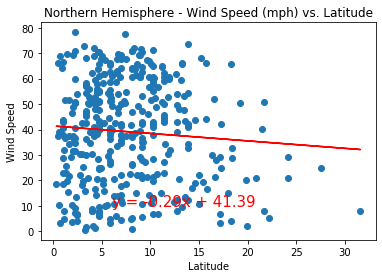

In [16]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Wind Speed and Latitude for the Northern Hemisphere
northern_wind_correlation = round(st.pearsonr(northern_hemisphere['Wind Speed'],northern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = northern_hemisphere['Wind Speed']
y_values = northern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.07727225769485238


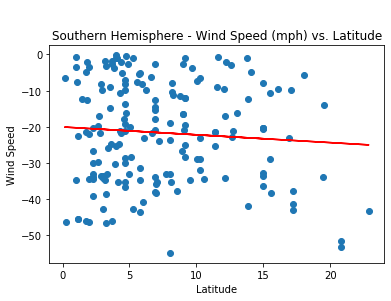

In [17]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Wind Speed and Latitude for the Southern Hemisphere
sourthern_wind_correlation = round(st.pearsonr(southern_hemisphere['Wind Speed'],southern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = southern_hemisphere['Wind Speed']
y_values = southern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()